<h3>Policemen catch Thieves</h3>
<p> Given an array of size n that has the following specifications: <br> 
    <ul>
        <li>Each element in the array contains either a policeman or a thief</li>
        <li>Each policeman can catch only one thief</li>
        <li>A policeman cannot catch a thief who is more than K units away from the policeman</li>
    </ul><br>
    We need to find the maximum number of thieves that can be caught. Example:<br>
    
    Array = [👮🏽‍♂️,🧟‍,👮🏽‍♂️,🧟‍♂️,🧟‍,👮🏽‍♂️]
    k = 1
    Best solution: 3
    
    Array = [👮🏽‍♂️,🧟‍,👮🏽‍♂️,👮🏽‍♂️,🧟‍♂️,🧟‍]
    k = 2
    Best solution: 3
    
    Array = [👮🏽‍♂️,👮🏽‍♂️,👮🏽‍♂️,🧟‍♂️,🧟‍♂️,🧟‍]
    k = 3
    Best solution: 3

To solve this, we will use a greedy algorithm with the following rule: for each policeman from the left catch the farthest possible thief (preferably without nearby police)
</p>

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from numpy import random

In [15]:
def GreedyPoliceThieve(arr, k):
    
    n = len(arr)
    iterations = 0
    picked = [False] * n
    
    for i in range(0,n):
        iterations+=1
        if arr[i] == '👮🏽‍♂️':
            
            picked[i] = True
            polices_left,polices_right = 0, 0
            farthest_left,farthest_right = None, None

            for j in range(i-1, i-k-1, -1):
                iterations+=1
                if j < 0:
                    continue
                if arr[j] == '🧟‍' and not picked[j]:
                    farthest_left = j 
                elif arr[j] == '👮🏽‍♂️':
                    polices_left+= 1
                    
            for j in range(i+1, i+k+1):
                iterations+=1
                if j >= len(arr):
                    continue
                if arr[j] == '🧟‍' and not picked[j]:
                    farthest_right = j 
                elif arr[j] == '👮🏽‍♂️':
                    polices_right+= 1
            
            if farthest_left is None:
                if farthest_right is not None:
                    picked[farthest_right] = True
                continue
            elif farthest_right is None: 
                picked[farthest_left] = True
                continue
            
            if i - farthest_left == farthest_right - i:
                if(polices_left > polices_right):
                    picked[farthest_right] = True
                else:
                    picked[farthest_left] = True
            elif i - farthest_left > farthest_right - i:
                picked[farthest_left] = True
            else:
                picked[farthest_right] = True
     
    
    total = 0
    for i in range(0,len(picked)):
        iterations+=1
        if(picked[i] is True):
            if arr[i] == '🧟‍':
                total+=1
                
    return total, iterations

In [5]:
def BrutePoliceThieve(arr, k):
    print('test')

In [6]:
arr2 = ['👮🏽‍♂️','🧟‍','👮🏽‍♂️','🧟‍','🧟‍','👮🏽‍♂️']
k = 3
total, it = GreedyPoliceThieve(arr2,k)
print("Thieves picked: " + str(total))

Thieves picked: 2


In [7]:
arr3 = ['🧟‍','🧟‍','👮🏽‍♂️','👮🏽‍♂️','🧟‍','👮🏽‍♂️']
k = 2
total, it = GreedyPoliceThieve(arr3,k)
print("Thieves picked: " + str(total))

Thieves picked: 3


In [8]:
arr3 = ['🧟‍','👮🏽‍♂️','🧟‍','🧟‍','🧟‍','👮🏽‍♂️','👮🏽‍♂️','🧟‍','👮🏽‍♂️']
k = 2
total, it = GreedyPoliceThieve(arr3,k)
print("Thieves picked: " + str(total))

Thieves picked: 3


In [58]:
x = [50,100,150,200,250]  # Different input sizes
samples = 100         # Quantity of samples to be averaged
greedy_approach = []  # Quantity of iterations

In [59]:
# Calculate the average iterations of all approaches
for i in range(len(x)):
    
    it1, it2 = 0,0
    iterations1, iterations2 = 0,0
    
    for k in range (0,samples):
        
        array = []
        for j in range(x[i]):
            rand = random.choice(['🧟‍','👮🏽‍♂️'])
            array.append(rand)
        
        k = np.random.randint(0, x[i]//3, size=1)[0]
        total, iterations1 = GreedyPoliceThieve(array,k)

        it1 = it1 + iterations1
    
    greedy_approach.append(it1/samples)

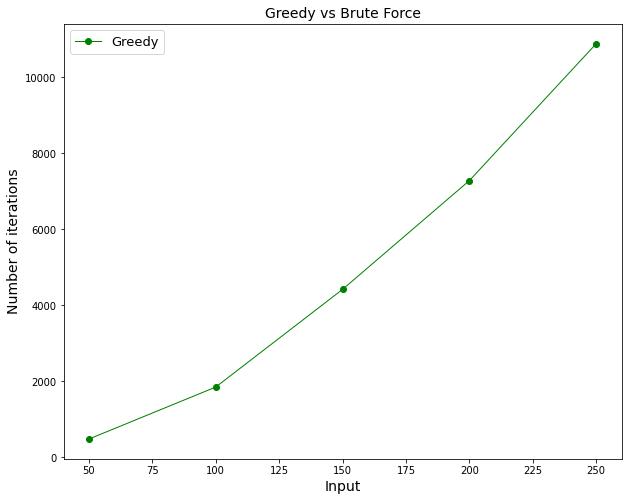

In [61]:
# Plots the complexity graph
plt.figure(figsize=(10, 8))
plt.plot(x,greedy_approach, c="green", ls="-", lw = 1, marker="o", label="Greedy")
plt.title("Greedy vs Brute Force",fontsize=14)
plt.xlabel("Input",fontsize=14)
plt.ylabel("Number of iterations",fontsize=14)
plt.legend(fontsize=13)
plt.show()

In [116]:
def maxSetSize(arr):
    maxSize = 0
    for s in arr:
        if(len(s) > maxSize):
            maxSize = len(s)
 
    return maxSize
 
def catch(arr, n, pos, k, currComb, allComb):
    if(pos < n):
        if(arr[pos] == "P"):
            for i in range(pos-1-k, pos+1+k):            
                if(i >= 0 and i < n and arr[i] == "T"):
                    
                    
                    breaks = False
                    for comb in currComb:
                        if (pos) in comb:
                            breaks = True
                    if breaks:
                        continue
                    
                    currComb.add((pos, i))
                    catch(arr, n, pos+1, k, currComb, allComb)
        else:
            catch(arr, n, pos+1, k, currComb, allComb)
    else:
        allComb.append(currComb)
        return

def policeThief(arr, n, k):
    allComb = list()
    currComb = set()
 
    if(n > 0):
        catch(arr, n, 0, k, currComb, allComb)
        
    print(allComb)
    #print(currComb)
 
    #print(maxSetSize(allComb))

In [117]:
arr = ['P', 'T', 'T', 'P', 'T']
k = 2
n = len(arr)

print(policeThief(arr, n, k))

[{(0, 1), (3, 1)}]
None


In [60]:
print(3 in [(0, 1), (3, 4), (3, 1), (0, 2), (3, 2)])


False


In [75]:
for x in {(0, 1), (3, 2), (3, 1)}:
    print(1 in x)

True
False
True


In [80]:
(0,1)[0]

0